<a href="https://colab.research.google.com/github/NoobBeginnerReal/financialdistress_with_decisiontree/blob/main/copy_of_paper1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1st step is installing vnstock

In [ ]:
!pip install -U vnstock

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 5.7 MB/s eta 0:00:00


Hose

In [ ]:
from vnstock import *
from vnstock.explorer.vci.listing import Listing
from vnstock.explorer.vci.company import Company

# Initialize Vnstock object to list symbols
stock = Vnstock().stock(symbol='AAA', source='TCBS')
stock.listing.symbols_by_industries()

,symbol,organ_name,en_organ_name,icb_name3,en_icb_name3,icb_name2,en_icb_name2,icb_name4,en_icb_name4,com_type_code,icb_code1,icb_code2,icb_code3,icb_code4
0,BMK,Công ty Cổ Phần Kỹ thuật Nhiệt Mèo Đen,Black Cat Insulation Technical Joint Stock Com...,Xây dựng và Vật liệu,Construction & Materials,Xây dựng và Vật liệu,Construction & Materials,Vật liệu xây dựng & Nội thất,Building Materials & Fixtures,CT,2000,2300,2350,2353
1,ACB,Ngân hàng Thương mại Cổ phần Á Châu,Asia Commercial Joint Stock Bank,Ngân hàng,Banks,Ngân hàng,Banks,Ngân hàng,Banks,NH,8301,8300,8350,8355
2,AIG,Công ty Cổ phần Nguyên liệu Á Châu AIG,AIG Asia Ingredients Corporation,Sản xuất thực phẩm,Food Producers,Thực phẩm và đồ uống,Food & Beverage,Thực phẩm,Food Products,CT,3000,3500,3570,3577
3,ATB,Công ty Cổ phần An Thịnh,An Thinh Joint Stock Company,Xây dựng và Vật liệu,Construction & Materials,Xây dựng và Vật liệu,Construction & Materials,Xây dựng,Heavy Construction,CT,2000,2300,2350,2357
4,BNA,Công ty Cổ phần Tập đoàn Đầu tư Bảo Ngọc,Bao Ngoc Investment Group Joint Stock Company,Sản xuất thực phẩm,Food Producers,Thực phẩm và đồ uống,Food & Beverage,Thực phẩm,Food Products,CT,3000,3500,3570,3577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,X20,Công ty Cổ phần X20,X20 Joint Stock Company,Hàng cá nhân,Personal Goods,Hàng cá nhân & Gia dụng,Personal & Household Goods,Hàng May mặc,Clothing & Accessories,CT,3000,3700,3760,3763
1591,XMD,Công ty Cổ phần Xuân Mai - Đạo Tú,Xuan Mai - Dao Tu Joint Stock Company,Xây dựng và Vật liệu,Construction & Materials,Xây dựng và Vật liệu,Construction & Materials,Vật liệu xây dựng & Nội thất,Building Materials & Fixtures,CT,2000,2300,2350,2353
1592,DFC,Công ty Cổ phần Xích líp Đông Anh,Dong Anh C&F Joint Stock Company,Kim loại,Industrial Metals & Mining,Tài nguyên Cơ bản,Basic Resources,Thép và sản phẩm thép,Steel,CT,1000,1700,1750,1757
1593,YBM,Công ty Cổ phần Khoáng sản Công nghiệp Yên Bái,Yen Bai Industry Mineral Joint Stock Company,Khai khoáng,Mining,Tài nguyên Cơ bản,Basic Resources,Khai khoáng,General Mining,CT,1000,1700,1770,1775


In [ ]:
from vnstock import *
from vnstock.explorer.vci.listing import Listing
from vnstock.explorer.vci.company import Company
import pandas as pd
import random

# Initialize Vnstock object to list symbols
stock = Vnstock().stock(symbol='AAA', source='TCBS')

# Pull all companies from all industries
all_symbols = stock.listing.symbols_by_industries()

# Check the columns
print(all_symbols.columns)

# Get companies with ICB code 2000 - Industrials / Manufacturing
industrial_symbols = all_symbols[all_symbols['icb_code1'] == '2000']
industrial_symbols = industrial_symbols[['symbol', 'en_organ_name', 'en_icb_name3']]

# Save to csv
industrial_symbols.to_csv("industrial_symbols.csv", index=False)
print("Filtered symbols saved to 'industrial_symbols.csv'")



Index(['symbol', 'organ_name', 'en_organ_name', 'icb_name3', 'en_icb_name3',
       'icb_name2', 'en_icb_name2', 'icb_name4', 'en_icb_name4',
       'com_type_code', 'icb_code1', 'icb_code2', 'icb_code3', 'icb_code4'],
      dtype='object')
Filtered symbols saved to 'industrial_symbols.csv'


In [ ]:
# Import necessary libraries
import pandas as pd
from vnstock import Vnstock

# Load the filtered industrial symbols
industrial_symbols = pd.read_csv("industrial_symbols.csv")

# Extract the 'symbol' column
stock_symbols = industrial_symbols['symbol'].tolist()

# List to store merged data for all stocks
merged_data_list = []

# Loop through each stock symbol to get data
for symbol in stock_symbols:
    # Initialize Vnstock for each stock
    stock_data = Vnstock().stock(symbol=symbol, source='TCBS')

    # Get data for each stock
    try:
        income_statement = stock_data.finance.income_statement(period='year')
        balance_sheet = stock_data.finance.balance_sheet(period='year')
        cash_flow = stock_data.finance.cash_flow(period='year')
        financial_ratio = stock_data.finance.ratio(period='year')

        # Add stock symbol to each DataFrame
        income_statement['Stock'] = symbol
        balance_sheet['Stock'] = symbol
        cash_flow['Stock'] = symbol
        financial_ratio['Stock'] = symbol

        # Merge the data on year and stock symbol
        merged_stock_data = pd.merge(income_statement, balance_sheet, on=['period', 'Stock'], how='outer')
        merged_stock_data = pd.merge(merged_stock_data, cash_flow, on=['period', 'Stock'], how='outer')
        merged_stock_data = pd.merge(merged_stock_data, financial_ratio, on=['period', 'Stock'], how='outer')

        # Append the merged data to the list
        merged_data_list.append(merged_stock_data)

    except Exception as e:
        print(f"Error occurred for stock {symbol}: {e}")
        continue

# Concatenate all the data into a single DataFrame
if merged_data_list:
    final_merged_data = pd.concat(merged_data_list, ignore_index=True)

    # Save the merged data into a single sheet in Excel
    with pd.ExcelWriter('industrial_all.xlsx', engine='openpyxl') as writer:
        final_merged_data.to_excel(writer, sheet_name='All_Stocks_Data', index=False)

    print("Financial data for all industrial stocks has been successfully saved to 'industrial_all.xlsx'")
else:
    print("No data was retrieved.")


Error occurred for stock BMK: 'year'
Error occurred for stock HLO: "['ticker'] not found in axis"
Error occurred for stock VMK: "['ticker'] not found in axis"
Error occurred for stock TSA: "['ticker'] not found in axis"
Error occurred for stock BCR: 'year'
Error occurred for stock CCC: "['ticker'] not found in axis"
Error occurred for stock TAB: "['ticker'] not found in axis"
Error occurred for stock CAR: "['ticker'] not found in axis"
Error occurred for stock ING: "['ticker'] not found in axis"
Error occurred for stock QNP: "['ticker'] not found in axis"
Error occurred for stock MTX: "['ticker'] not found in axis"
Error occurred for stock TBH: "['ticker'] not found in axis"
Financial data for all industrial stocks has been successfully saved to 'industrial_all.xlsx'


In [ ]:
import pandas as pd

# Step 1: Load the Excel file
industrial_data = pd.read_excel("industrial_all.xlsx")

# Step 2: Convert to CSV
industrial_data.to_csv("industrial_all.csv", index=False)
print("Converted 'industrial_all.xlsx' to 'industrial_all.csv'.")

# Step 3: Check for unique 'Stock'
unique_stocks = industrial_data['Stock'].nunique()
print(f"Number of unique stocks: {unique_stocks}")

# Step 4: Total observations
total_observations = industrial_data.shape[0]
print(f"Total observations: {total_observations}")

# Step 5: Missing values per column
missing_values = industrial_data.isnull().sum()
print("Missing values per column:")
print(missing_values)


In [ ]:
# Calculate the percentage of missing values for each feature
missing_percentage = industrial_data.isnull().mean() * 100

# Filter features with more than 25% missing values
features_to_drop = missing_percentage[missing_percentage > 25].index
print(f"Features to drop (missing > 25%): {features_to_drop.tolist()}")

# Drop the identified features
dropped_data = industrial_data.drop(columns=features_to_drop)

# Check the new shape of the dataset
print(f"Original shape: {industrial_data.shape}")
print(f"New shape after dropping features: {dropped_data.shape}")

# Save the cleaned dataset for further analysis
dropped_data.to_csv("dropped_industrial_data.csv", index=False)
print("Cleaned dataset saved as 'dropped_industrial_data.csv'.")

In [ ]:
import pandas as pd

# Step 1: Load the dataset
industrial_data = pd.read_csv("dropped_industrial_data.csv")

# Step 3: Initialize an empty list to store years
year_column = []

# Step 4: Iterate over each stock to assign years
for stock, group in industrial_data.groupby('Stock'):
    # Calculate years in reverse order, starting from 2023
    num_rows = len(group)
    years = list(range(2023 - num_rows + 1, 2024))  # Adjust year range
    year_column.extend(years)

# Step 5: Add the 'year' column to the dataset
industrial_data['year'] = year_column

# Step 6: Preview the updated dataset
print(industrial_data.head())

# Step 7: Save the updated dataset
industrial_data.to_csv("industrial_with_year.csv", index=False)
print("Dataset with 'year' column saved as 'industrial_with_year.csv'")


In [ ]:
import pandas as pd

# Step 1: Load the dataset
industrial_data = pd.read_csv("dropped_industrial_data.csv")

# Step 3: Initialize an empty list to store years
year_column = []

# Step 4: Iterate over each stock to assign years
for stock in industrial_data['Stock'].unique():

  # Filter the data for current stock symbol
  stock_data = industrial_data[industrial_data['Stock'] == stock]

  # Determine the number of records for this stock
  num_records = len(stock_data)

  # Calculate years in reverse order, starting from 2023
  years = list(range(2023 - num_records + 1, 2023 + 1))

  # Append the generated years to the year list
  year_column.extend(years)

# Step 5: Add the 'year' column to the dataset
industrial_data['year'] = year_column

# Step 6: Preview the updated dataset
print(industrial_data.head())

# Step 7: Save the updated dataset
industrial_data.to_csv("industrial_with_year_updated2.csv", index=False)
print("Dataset with 'year' column saved as 'industrial_with_year_updated2.csv'")


After this step. cross checking the data with vietstockfinance to ensure reliability before imputing.
The new data after cross checking is named industrial_with_year_updated3.csv

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the dataset
data = pd.read_csv("industrial_with_year_updated3.csv")

# Step 2: Identify numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Step 3: Prepare the data for KNN Imputation
# Extract only numerical data for imputation
numeric_data = data[numerical_features]

# Step 4: Scale the numerical data for KNN Imputation
scaler = MinMaxScaler()  # Scale to [0, 1] range
scaled_numeric_data = scaler.fit_transform(numeric_data)

# Step 5: Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)  # Using 5 nearest neighbors
imputed_scaled_data = knn_imputer.fit_transform(scaled_numeric_data)

# Step 6: Inverse transform to restore original scale
imputed_numeric_data = scaler.inverse_transform(imputed_scaled_data)

# Replace the numerical columns in the original dataset with the imputed values
data[numerical_features] = imputed_numeric_data

# Step 7: Handle categorical features (optional, mode imputation for missing categorical data)
for col in categorical_features:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mode()[0])

# Step 8: Save the imputed dataset
data.to_csv("imputed_industrial_data.csv", index=False)
print("Imputed dataset saved as 'imputed_industrial_data.csv'.")

# Step 9: Validate imputation
# Check for remaining missing values
missing_values = data.isnull().sum().sum()
print(f"Total missing values after imputation: {missing_values}")

# Optional: Print summary of missing values per column
print("Remaining missing values per column:")
print(data.isnull().sum())


Imputed dataset saved as 'imputed_industrial_data.csv'.
Total missing values after imputation: 0
Remaining missing values per column:
Stock                          0
year                           0
short_asset                    0
revenue                        0
year_revenue_growth            0
                              ..
ebit_on_revenue                0
pre_tax_on_ebit                0
payable_on_equity              0
ebitda_on_stock_change         0
book_value_per_share_change    0
Length: 66, dtype: int64


Year Distribution:
year
2002.0      1
2003.0      5
2004.0     19
2005.0    115
2006.0    149
2007.0    231
2008.0    295
2009.0    327
2010.0    354
2011.0    376
2012.0    396
2013.0    420
2014.0    461
2015.0    502
2016.0    528
2017.0    540
2018.0    550
2019.0    558
2020.0    563
2021.0    570
2022.0    569
2023.0    568
2024.0      1
Name: count, dtype: int64


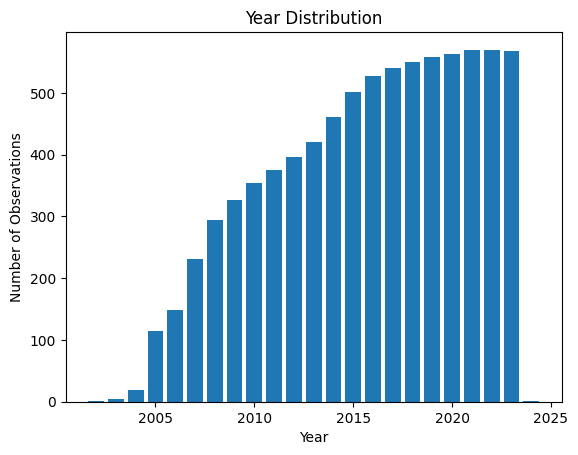

Filtered dataset saved as 'filtered_industrial_data.csv'.
Filtered Year Distribution:
year
2015.0    502
2016.0    528
2017.0    540
2018.0    550
2019.0    558
2020.0    563
2021.0    570
2022.0    569
2023.0    568
Name: count, dtype: int64


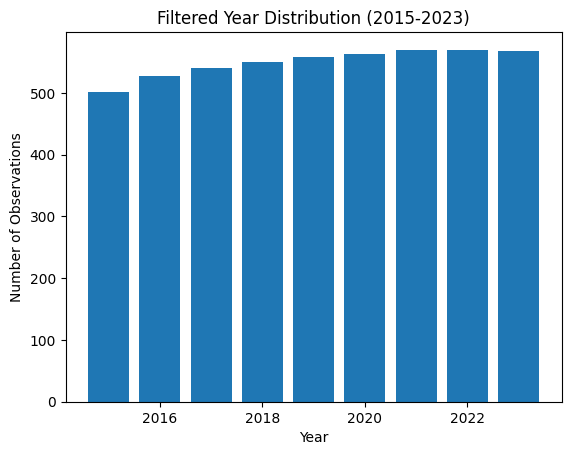

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("imputed_industrial_data.csv")

# Step 1: Examine the year distribution
year_distribution = data['year'].value_counts().sort_index()
print("Year Distribution:")
print(year_distribution)

# Step 2: Visualize the year distribution (optional)
import matplotlib.pyplot as plt

plt.bar(year_distribution.index, year_distribution.values)
plt.xlabel("Year")
plt.ylabel("Number of Observations")
plt.title("Year Distribution")
plt.show()

# Filter the dataset to include only years 2015 to 2023
chosen_years = range(2015, 2024)  # 2023 inclusive
filtered_data = data[data['year'].isin(chosen_years)]

# Save the filtered dataset
filtered_data.to_csv("filtered_industrial_data.csv", index=False)
print(f"Filtered dataset saved as 'filtered_industrial_data.csv'.")

# Verify the new year distribution
filtered_year_distribution = filtered_data['year'].value_counts().sort_index()
print("Filtered Year Distribution:")
print(filtered_year_distribution)

# Optional: Visualize the new distribution
import matplotlib.pyplot as plt

plt.bar(filtered_year_distribution.index, filtered_year_distribution.values)
plt.xlabel("Year")
plt.ylabel("Number of Observations")
plt.title("Filtered Year Distribution (2015-2023)")
plt.show()



Picked year 2015 to 2023 due to year distribution density

Use target_assigned_data.csv for next step

Class Distribution:
target
0    4242
1     715
Name: count, dtype: int64


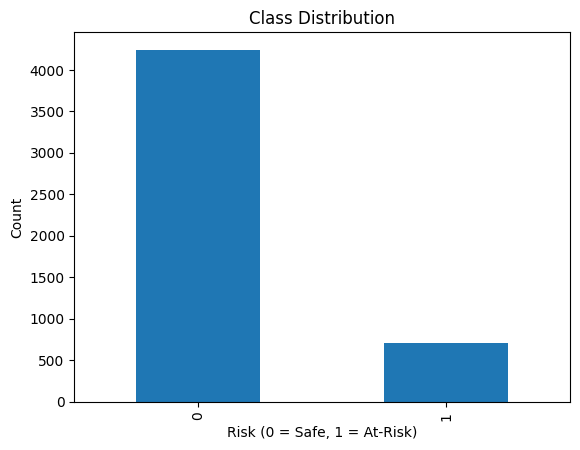

In [ ]:
import pandas as pd
# Load the dataset
data = pd.read_csv("target_assigned_data.csv")
# Class distribution
class_counts = data['target'].value_counts()
print("Class Distribution:")
print(class_counts)

# Plot class distribution
import matplotlib.pyplot as plt

class_counts.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Risk (0 = Safe, 1 = At-Risk)")
plt.ylabel("Count")
plt.show()


In [ ]:
num_companies = data['Stock'].nunique()
print(f"Number of unique companies: {num_companies}")


Number of unique companies: 573


Fixing zero denominator issue by replacing zeroes with extremely small numbers

In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('experimenting_target_assigned_data.csv')

# Columns to exclude
exclude_columns = ['Stock', 'target', 'Zmijewski', 'year']

# Identify numeric columns to modify
numeric_columns = df.select_dtypes(include=['number']).columns
columns_to_modify = [col for col in numeric_columns if col not in exclude_columns]

# Replace zeroes with epsilon
epsilon = 1e-10
df[columns_to_modify] = df[columns_to_modify].replace(0, epsilon)

# Check the result
print(df.head())

# Export the modified dataset to a new CSV file
output_file = 'modified_dataset.csv'
df.to_csv(output_file, index=False)

print(f"Modified dataset saved to {output_file}")

Run through Decision Tree 1st time with full dataset

Accuracy: 0.96
Precision: 0.84
Recall: 0.91
F1 Score: 0.88
AUC: 0.9418550892147656
Cross Entropy (Log Loss): 1.356481579160323
Specificity: 0.97
True Positives (TP): 199
False Positives (FP): 37
True Negatives (TN): 1233
False Negatives (FN): 19


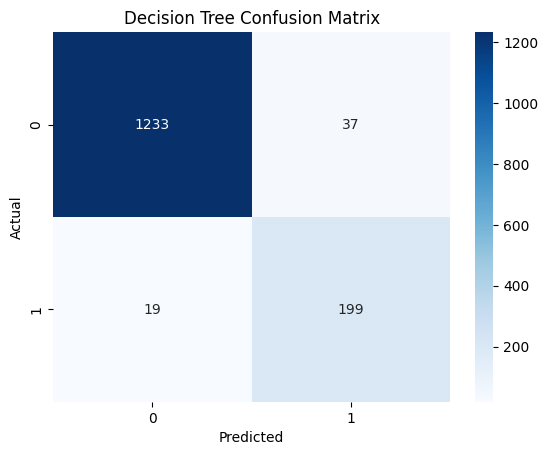

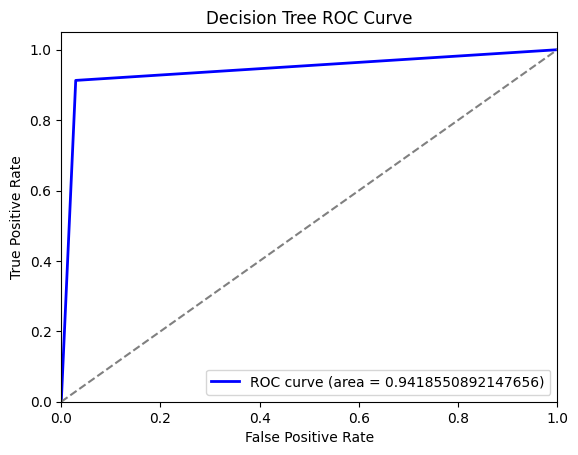

In [ ]:
# Import necessary libraries for Decision Tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, log_loss

df = pd.read_csv('modified_dataset_X.csv')

X = df.drop(columns=['target', 'Stock', 'Zmijewski'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1] if hasattr(dt_model, "predict_proba") else None

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
cross_entropy = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc}")
print(f"Cross Entropy (Log Loss): {cross_entropy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

# Print confusion matrix values
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Plot ROC Curve if probabilities are available
if y_pred_proba is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Decision Tree ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini'],
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8],  # Test different values
    'max_leaf_nodes': [None, 5, 10, 15, 20, 25, 30],  # Test different values
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],        # Test different values
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]        # Test different values
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    scoring='recall',  # Use the desired metric
    cv=5,                # 5-fold cross-validation
    n_jobs=-1            # Use all available CPU cores
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3150 fits failed out of a total of 31500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 15, 'min_samples_leaf': 7, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9356161616161616


Rerun base line

Accuracy: 0.9657
Precision: 0.8494
Recall: 0.9312
F1 Score: 0.8884
AUC: 0.962013291916492
Cross Entropy (Log Loss): 0.2613520431643879
Specificity: 0.9717
True Positives (TP): 203
False Positives (FP): 36
True Negatives (TN): 1234
False Negatives (FN): 15


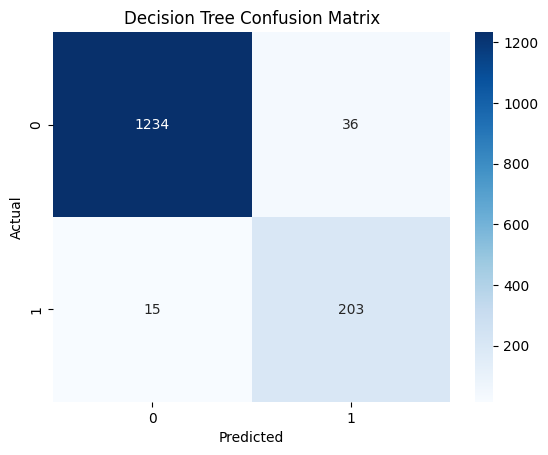

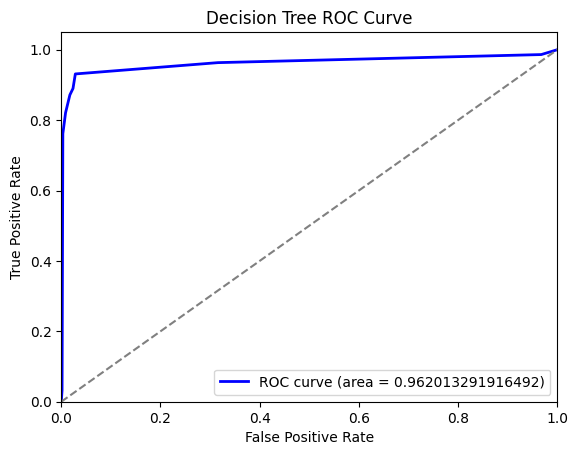

Kappa Coefficient: 0.8682


In [ ]:
# Import necessary libraries for Decision Tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, log_loss

df = pd.read_csv('modified_dataset_X.csv')

X = df.drop(columns=['target', 'Stock', 'Zmijewski'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


dt_model = DecisionTreeClassifier(
    random_state=42,
    max_leaf_nodes=22,
    class_weight='balanced',
    max_depth=5
)


dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1] if hasattr(dt_model, "predict_proba") else None

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
cross_entropy = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc}")
print(f"Cross Entropy (Log Loss): {cross_entropy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Print confusion matrix values
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Plot ROC Curve if probabilities are available
if y_pred_proba is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Decision Tree ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Kappa coefficient
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Kappa Coefficient: {kappa:.4f}")

Extract top important features

Features explaining 100% of cumulative importance for Decision Tree:
   Feature  Importance
10     X10    0.752528
17     X17    0.106787
21     X21    0.088878
2       X2    0.013218
24     X24    0.008545
22     X22    0.008158
16     X16    0.006331
7       X7    0.005813
11     X11    0.002701
29     X28    0.002033
15     X15    0.001970
19     X19    0.001511
23     X23    0.000763
26     X25    0.000763


<ipython-input-30-5f54c36a5128>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=selected_features_dt, palette='viridis')


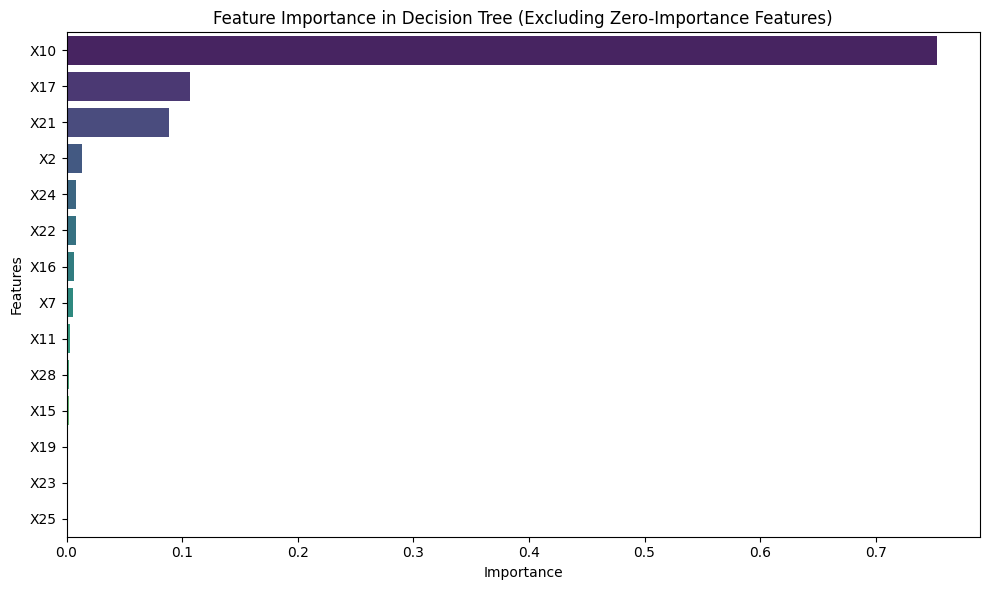

In [ ]:
# Extract feature importance from Decision Tree
feature_importances_dt = dt_model.feature_importances_
feature_names = X.columns

# Create a DataFrame of feature importances
importance_df_dt = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_dt
}).sort_values(by='Importance', ascending=False)

# Exclude features with zero importance
importance_df_dt = importance_df_dt[importance_df_dt['Importance'] > 0]

# Calculate cumulative importance
importance_df_dt['Cumulative_Importance'] = importance_df_dt['Importance'].cumsum()

# Set the threshold for cumulative importance (e.g., 90%)
threshold = 1  # Change this to your desired threshold (e.g., 0.95 for 95%)

# Filter features that contribute to the threshold cumulative importance
selected_features_dt = importance_df_dt[importance_df_dt['Cumulative_Importance'] <= threshold]

# Display the selected features
print(f"Features explaining {threshold * 100}% of cumulative importance for Decision Tree:")
print(selected_features_dt[['Feature', 'Importance']])

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=selected_features_dt, palette='viridis')
plt.title('Feature Importance in Decision Tree (Excluding Zero-Importance Features)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

Draw the tree for examination

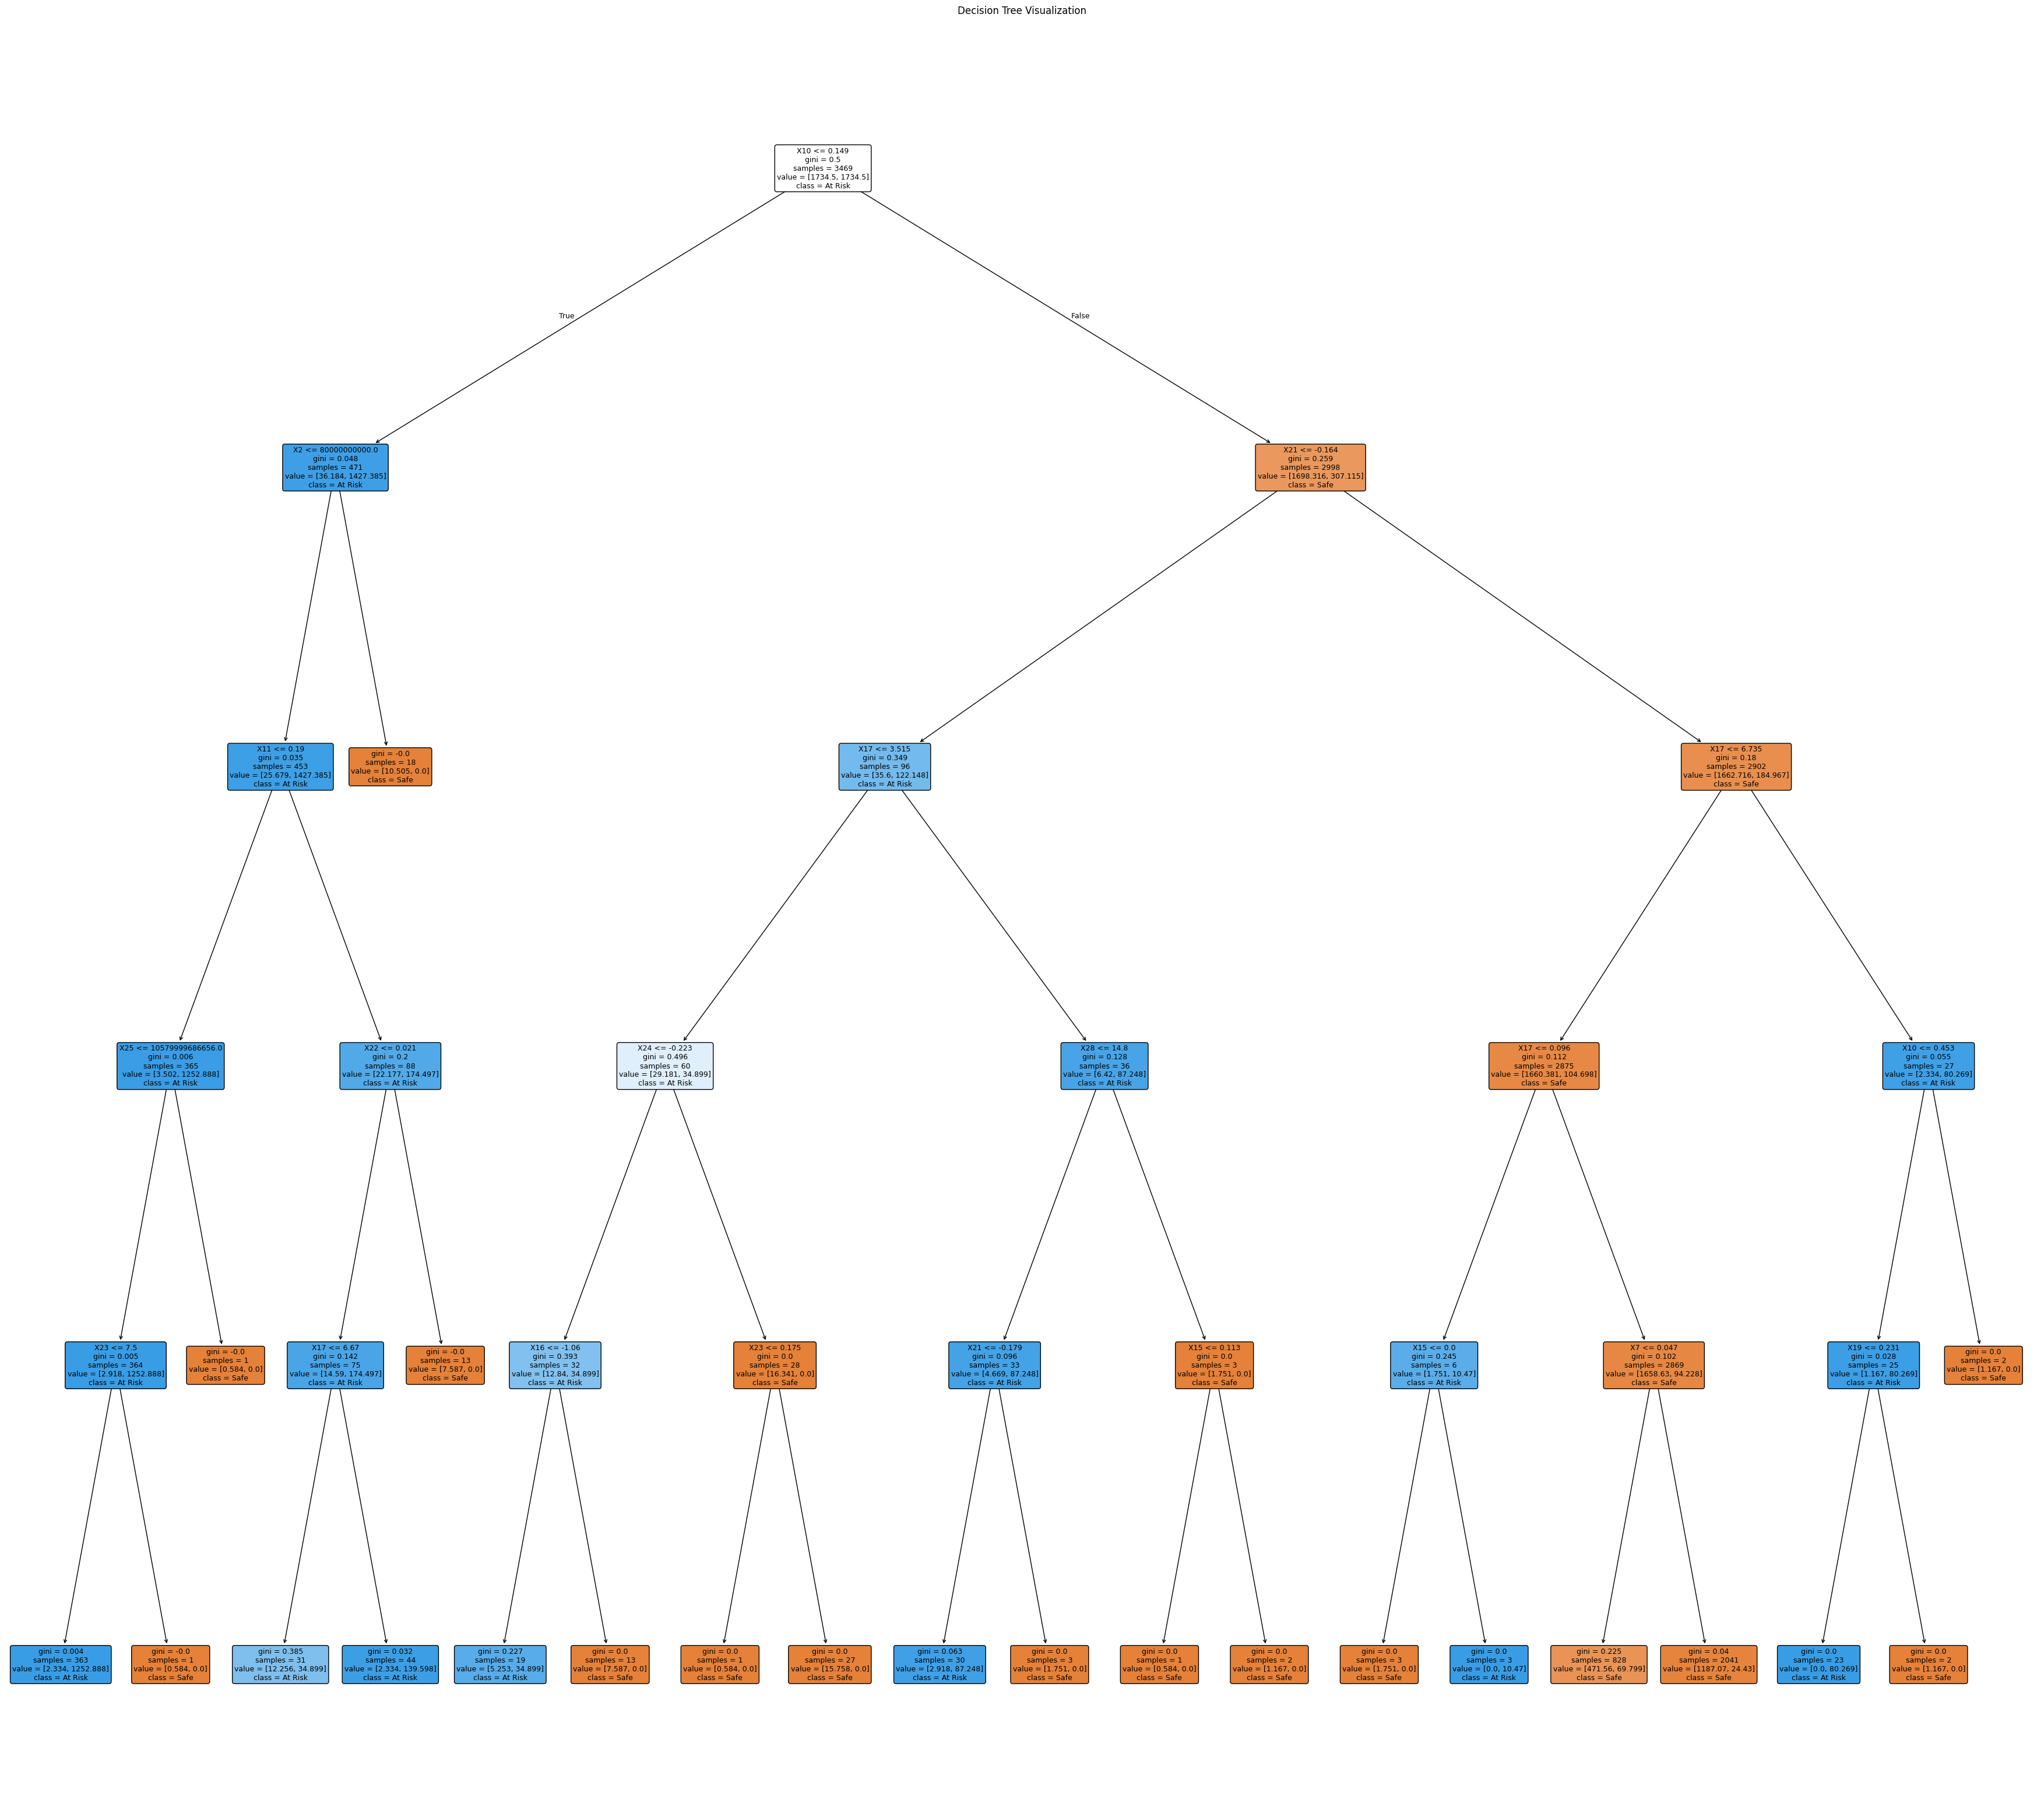

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree
plt.figure(figsize=(45, 40))  # Adjust size for better readability
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['Safe', 'At Risk'],  # Modify based on your target classes
    filled=True,  # Adds color to the nodes
    rounded=True,  # Rounds the edges of the nodes
    fontsize=9  # Adjust font size for better visibility
)
plt.title("Decision Tree Visualization")
plt.show()


Now run the filtered data to see what happen

In [ ]:
# Extract feature importance from Decision Tree
feature_importances_dt = dt_model.feature_importances_
feature_names = X.columns

# Create a DataFrame of feature importances
importance_df_dt = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_dt
}).sort_values(by='Importance', ascending=False)

# Exclude features with zero importance
importance_df_dt = importance_df_dt[importance_df_dt['Importance'] > 0]

# Calculate cumulative importance
importance_df_dt['Cumulative_Importance'] = importance_df_dt['Importance'].cumsum()

# Set the threshold for cumulative importance (e.g., 90%)
threshold = 1

# Filter features that contribute to 90% cumulative importance
selected_features_dt = importance_df_dt[importance_df_dt['Cumulative_Importance'] <= threshold]

# Get the list of selected features
selected_features_list = selected_features_dt['Feature'].tolist()

# Filter the original dataset to include only the selected features and 'Stock'
filtered_X_cum = X[selected_features_list]  # Keep only selected features
filtered_dataset_cum = pd.concat([filtered_X_cum, y], axis=1)  # Add the target column back

# Save the filtered dataset to a CSV file
filtered_dataset_cum.to_csv('modified_dataset_3XXX.csv', index=False)
print(f"Filtered dataset with features explaining 90% cumulative importance saved to 'modified_dataset_XXX.csv'.")


Filtered dataset with features explaining 90% cumulative importance saved to 'modified_dataset_XXX.csv'.


Now experiment with 90 cumulative variables

Accuracy: 0.9671
Precision: 0.8536
Recall: 0.9358
F1 Score: 0.8928
AUC: 0.9678357292494402
Cross Entropy (Log Loss): 0.19202166759642533
Specificity: 0.9724
True Positives (TP): 204
False Positives (FP): 35
True Negatives (TN): 1235
False Negatives (FN): 14


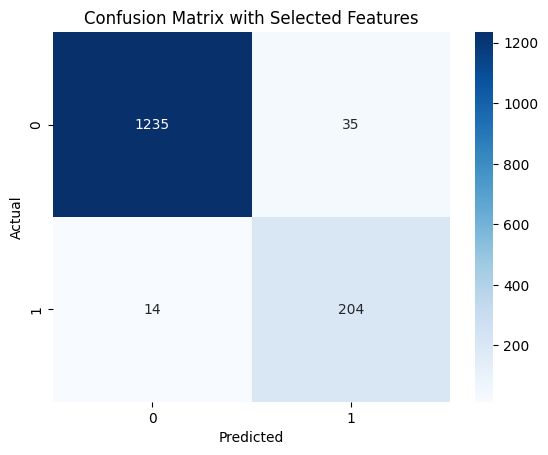

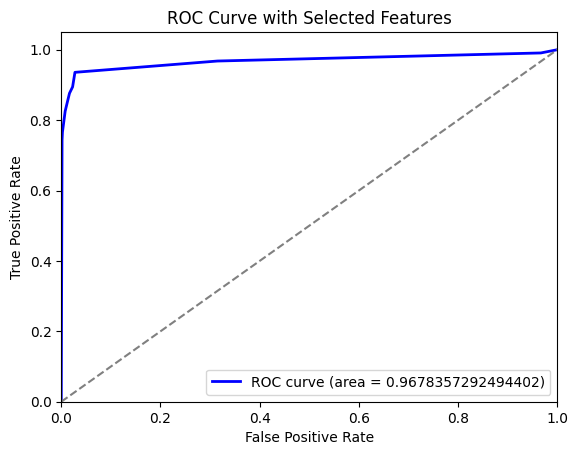

Kappa Coefficient: 0.8734


In [ ]:
# Import necessary libraries for Decision Tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, log_loss

df = pd.read_csv('modified_dataset_3XXX.csv')

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


dt_model = DecisionTreeClassifier(
    random_state=42,
    max_leaf_nodes=22,
    class_weight='balanced',
    max_depth=5
)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1] if hasattr(dt_model, "predict_proba") else None

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
cross_entropy = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc}")
print(f"Cross Entropy (Log Loss): {cross_entropy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Print confusion matrix values
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Selected Features')
plt.show()

# Plot ROC Curve if probabilities are available
if y_pred_proba is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve with Selected Features')
    plt.legend(loc="lower right")
    plt.show()
# Kappa coefficient
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Kappa Coefficient: {kappa:.4f}")

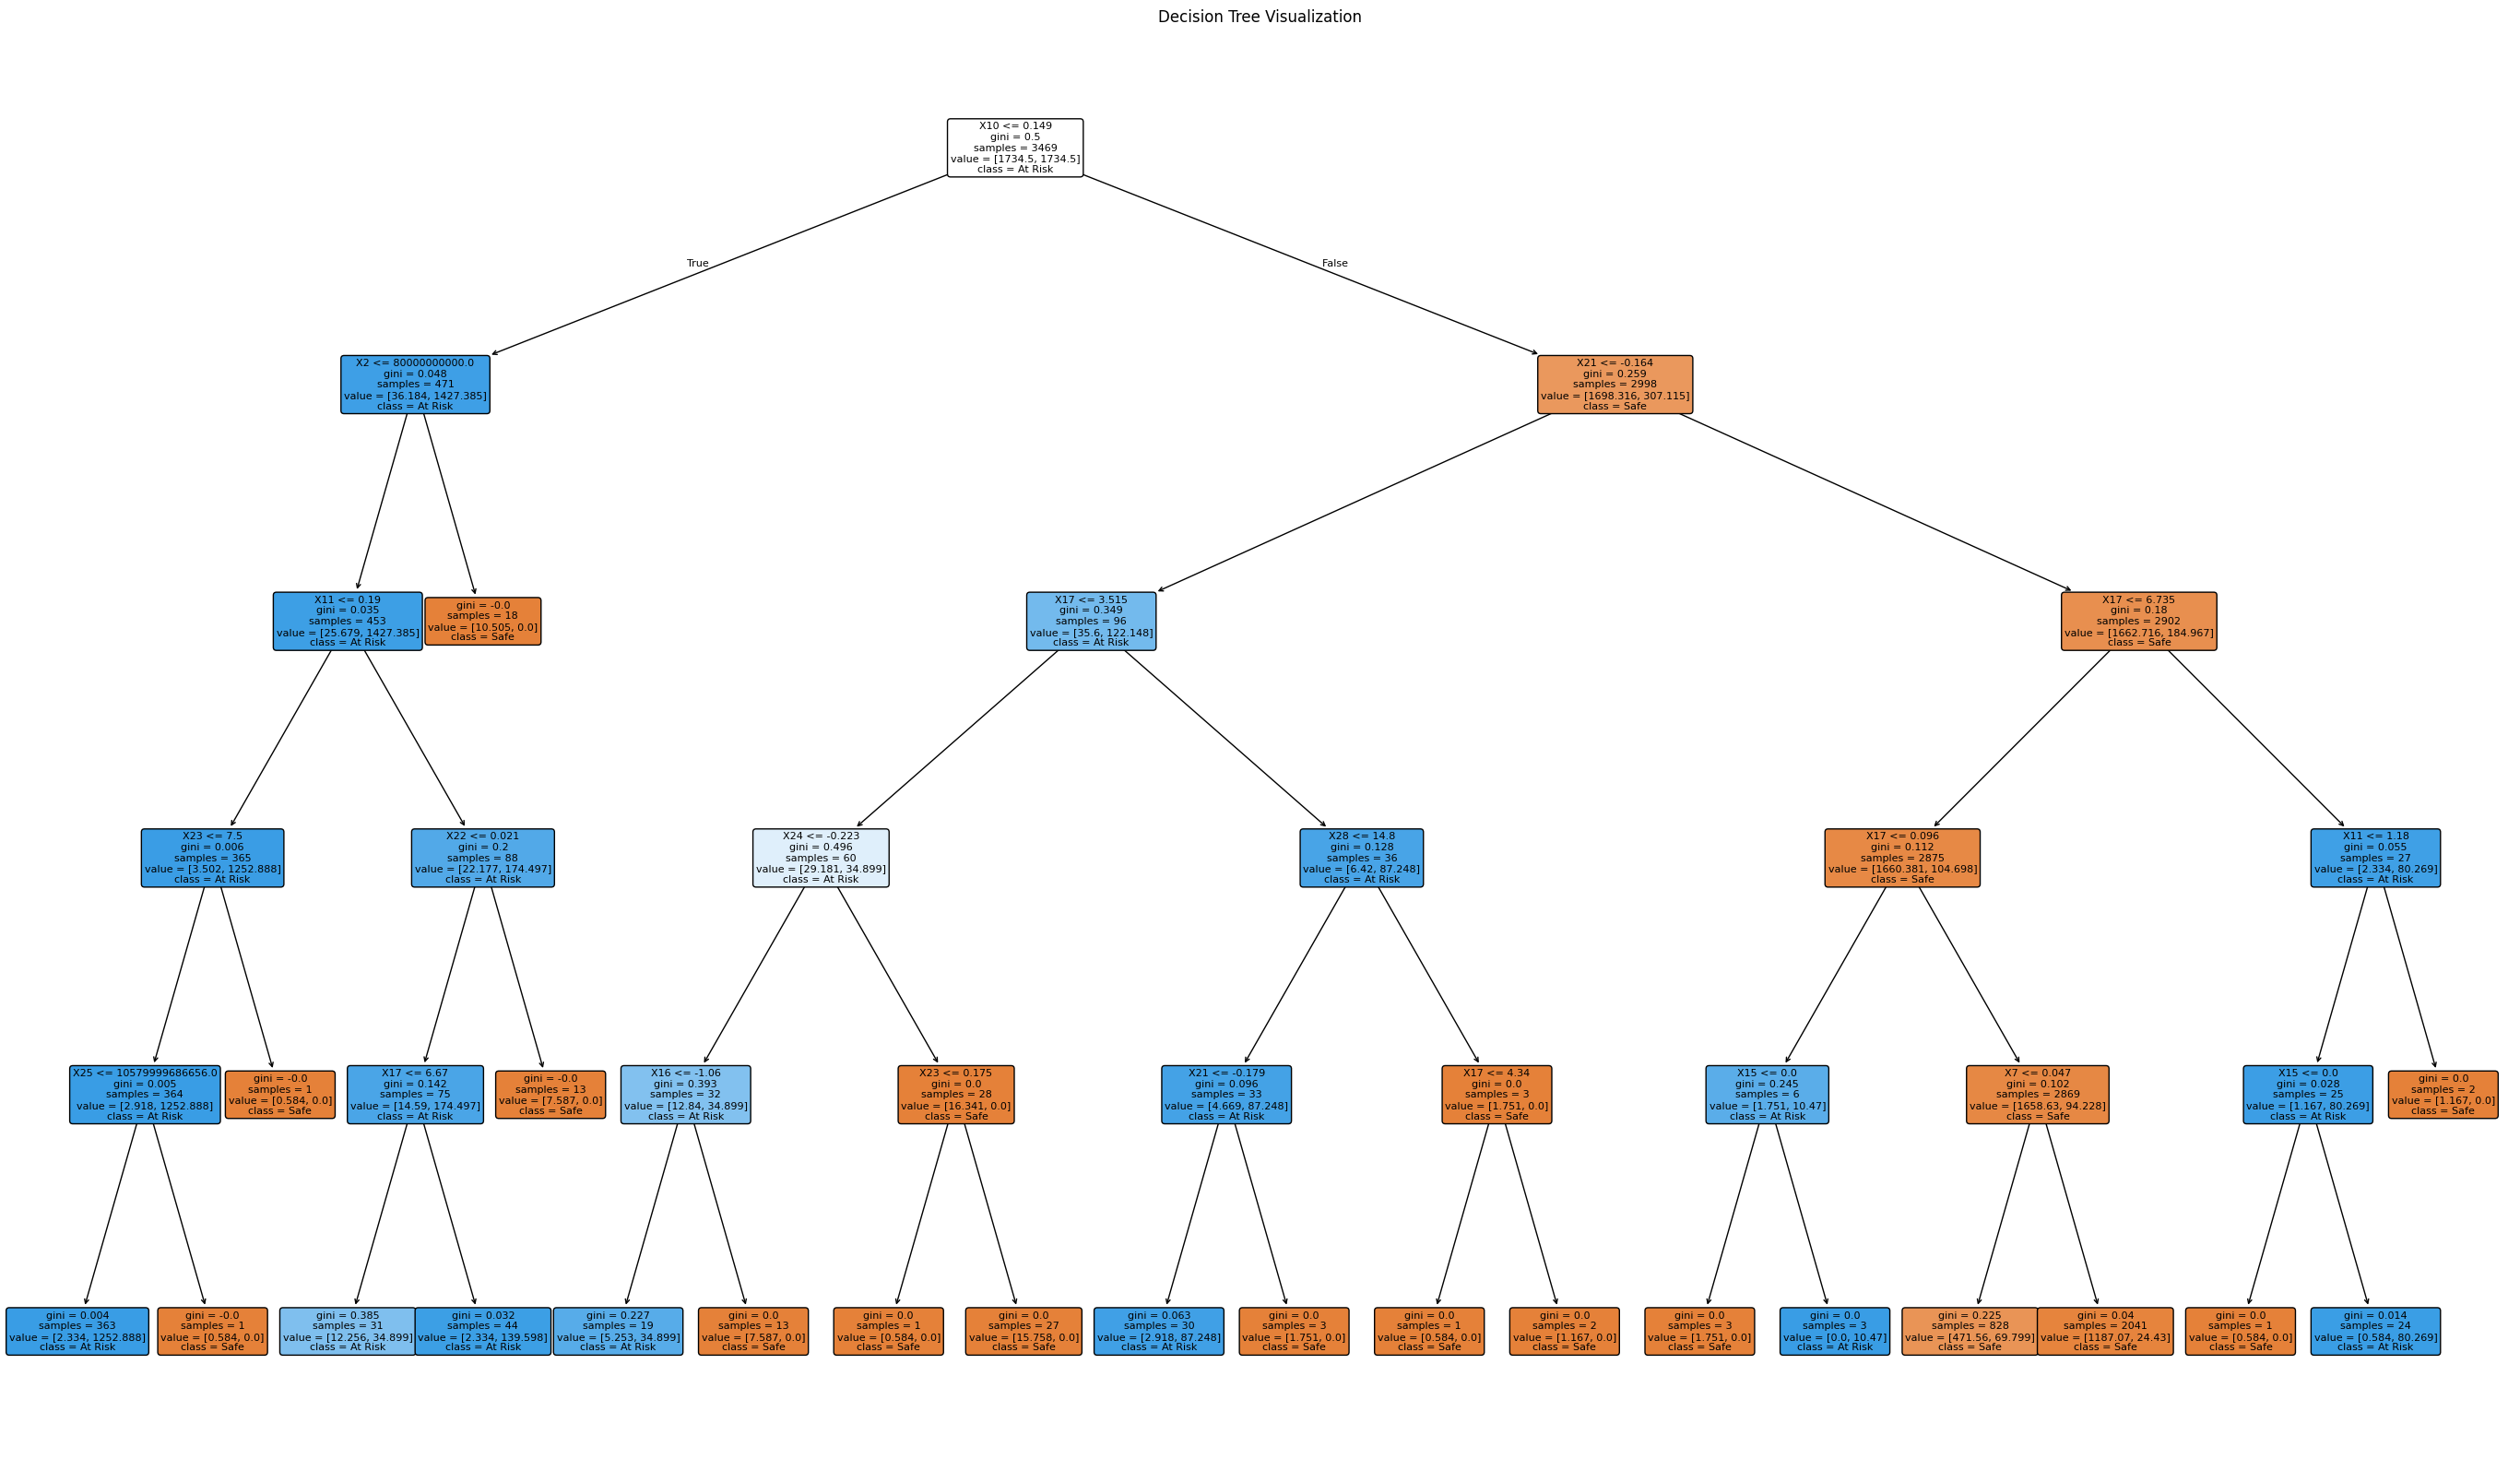

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree
plt.figure(figsize=(35, 20))  # Adjust size for better readability
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['Safe', 'At Risk'],  # Modify based on your target classes
    filled=True,  # Adds color to the nodes
    rounded=True,  # Rounds the edges of the nodes
    fontsize=8  # Adjust font size for better visibility
)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
from sklearn.tree import export_text

# Print tree structure
tree_rules = export_text(dt_model, feature_names=X.columns)
print(tree_rules)

|--- X10 <= 0.15
|   |--- X2 <= 80000000000.00
|   |   |--- X11 <= 0.19
|   |   |   |--- X23 <= 7.50
|   |   |   |   |--- X25 <= 10579999686656.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- X25 >  10579999686656.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- X23 >  7.50
|   |   |   |   |--- class: 0
|   |   |--- X11 >  0.19
|   |   |   |--- X22 <= 0.02
|   |   |   |   |--- X17 <= 6.67
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- X17 >  6.67
|   |   |   |   |   |--- class: 1
|   |   |   |--- X22 >  0.02
|   |   |   |   |--- class: 0
|   |--- X2 >  80000000000.00
|   |   |--- class: 0
|--- X10 >  0.15
|   |--- X21 <= -0.16
|   |   |--- X17 <= 3.51
|   |   |   |--- X24 <= -0.22
|   |   |   |   |--- X16 <= -1.06
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- X16 >  -1.06
|   |   |   |   |   |--- class: 0
|   |   |   |--- X24 >  -0.22
|   |   |   |   |--- X23 <= 0.17
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- X23 >  0.17
|   |   |   |   |   |

X10      -0.394096
X17       0.049950
X21      -0.025487
X2       -0.046197
X24      -0.003015
X22      -0.370324
X16       0.072231
X7       -0.234075
X11      -0.121239
X28      -0.003334
X15       0.100762
X19      -0.115925
X23      -0.120644
X25      -0.018304
target    1.000000
Name: target, dtype: float64


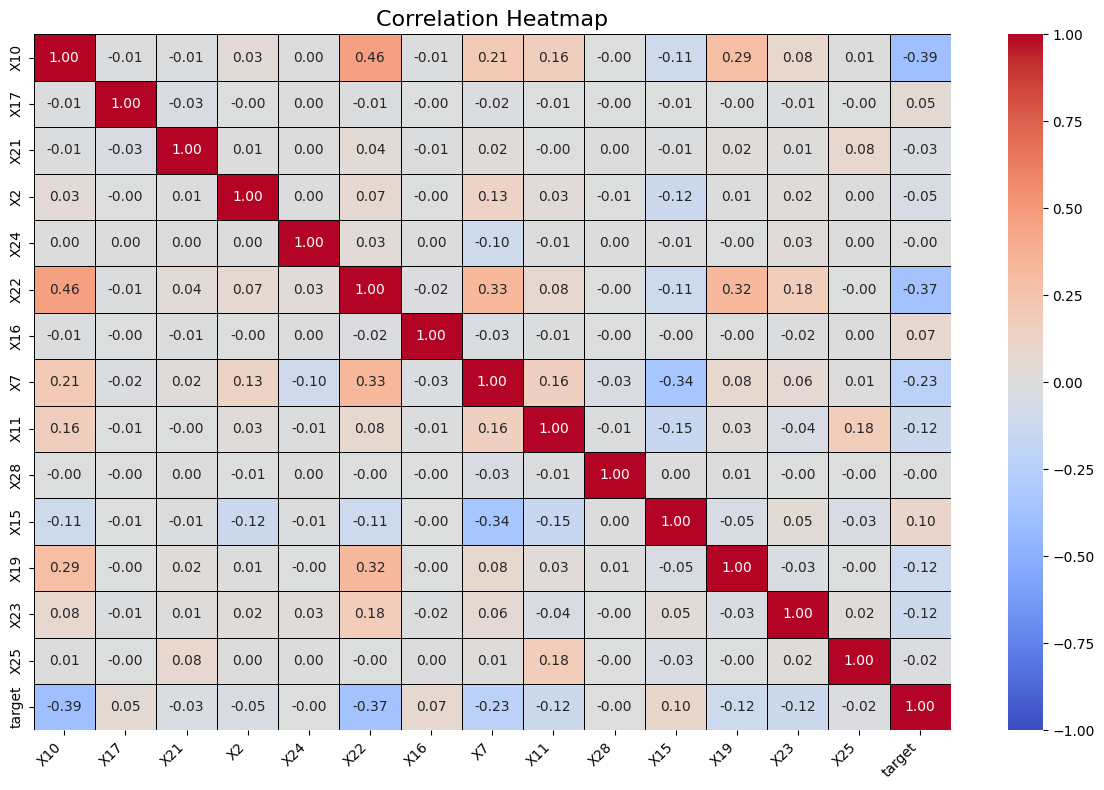

In [ ]:
import pandas as pd

# Assuming 'X_train' and 'y_train' are your features and target
correlation = pd.concat([X_train, y_train], axis=1).corr()
print(correlation['target'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(
    correlation,  # Correlation matrix
    annot=True,   # Annotate the heatmap with correlation values
    fmt=".2f",    # Format annotations to 2 decimal places
    cmap="coolwarm",  # Color map (e.g., 'coolwarm', 'viridis', 'plasma')
    vmin=-1,      # Minimum value for the color map
    vmax=1,       # Maximum value for the color map
    linewidths=0.5,  # Add lines between cells
    linecolor='black'  # Color of the lines
)

# Add a title
plt.title("Correlation Heatmap", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

The code below is used to plot smaller tree

In [ ]:
# Import necessary libraries for Decision Tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, log_loss

df = pd.read_csv('modified_dataset_XXX.csv')

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


dt_model = DecisionTreeClassifier(
    random_state=42,
    max_leaf_nodes=20,
    min_samples_leaf=1,
    min_samples_split=4,
    class_weight='balanced',
    max_depth=3
)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1] if hasattr(dt_model, "predict_proba") else None

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
cross_entropy = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc}")
print(f"Cross Entropy (Log Loss): {cross_entropy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Print confusion matrix values
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")
# Kappa coefficient
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Kappa Coefficient: {kappa:.4f}")

Accuracy: 0.9462
Precision: 0.7594
Recall: 0.9266
F1 Score: 0.8347
AUC: 0.9556291988730767
Cross Entropy (Log Loss): 0.18889831565594195
Specificity: 0.9496
True Positives (TP): 202
False Positives (FP): 64
True Negatives (TN): 1206
False Negatives (FN): 16
Kappa Coefficient: 0.8030


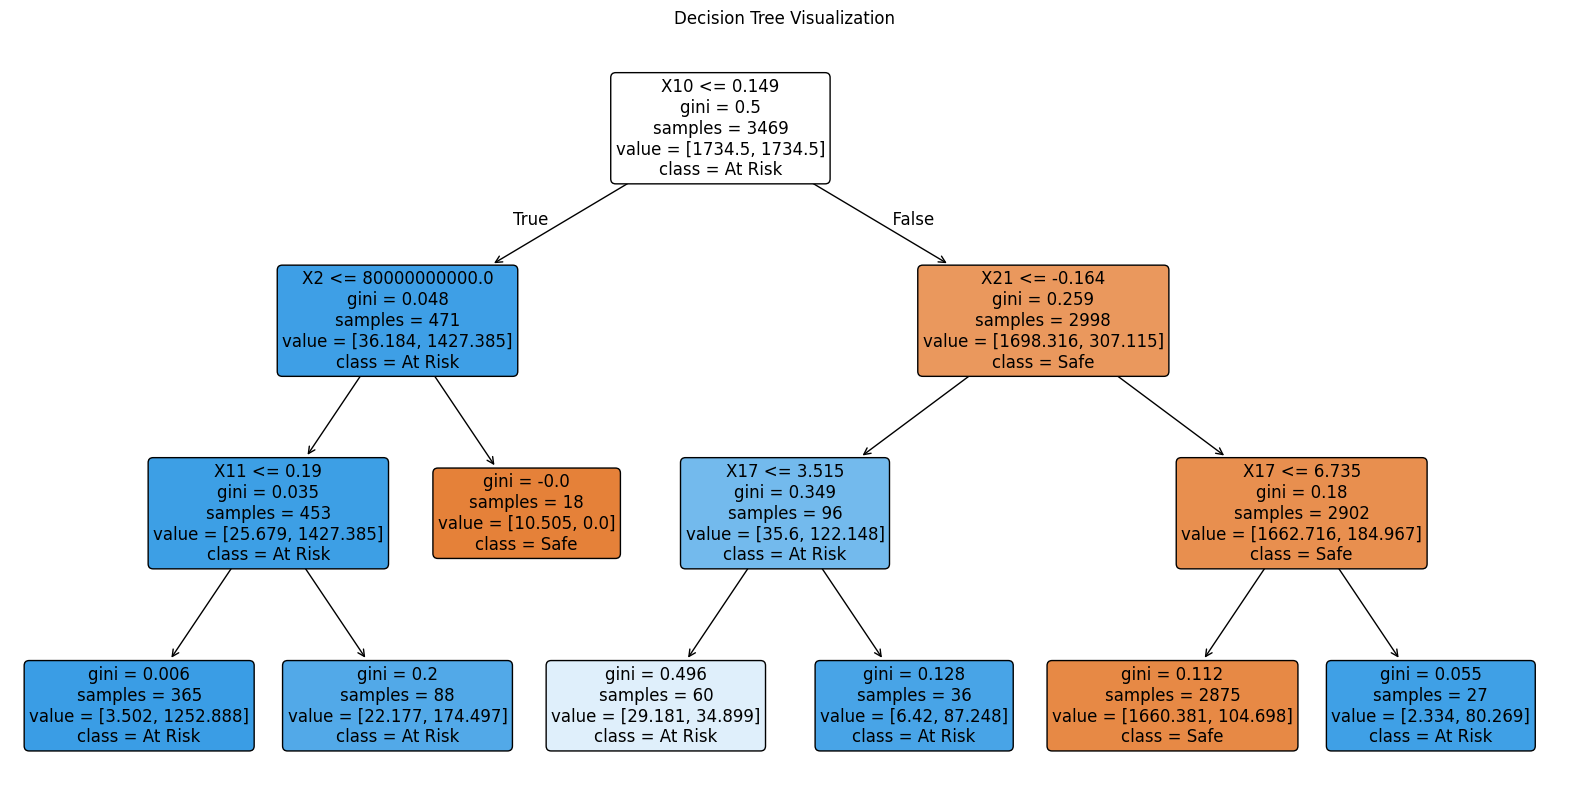

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust size for better readability
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['Safe', 'At Risk'],  # Modify based on your target classes
    filled=True,  # Adds color to the nodes
    rounded=True,  # Rounds the edges of the nodes
    fontsize=12  # Adjust font size for better visibility
)
plt.title("Decision Tree Visualization")
plt.show()
